In [1]:
import numpy as np 
import pandas as pd 


In [2]:
data = pd.read_csv("../input/diamond-price-prediction-dataset/Diamond Price Prediction.csv")
data.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [4]:
data.describe()

,Carat(Weight of Daimond),Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# MIssing Values IF Exists
data["Depth"] = data["Depth"].fillna(  data["Depth"].mean() )

In [6]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

data['Cut(Quality)'] = lb.fit_transform( data["Cut(Quality)"] )
data['Color'] = lb.fit_transform( data["Color"] )
data['Clarity'] = lb.fit_transform( data["Clarity"] )

data.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.corr()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
Carat(Weight of Daimond),1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
Cut(Quality),0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
Color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
Clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
Depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
Table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
Price(in US dollars),0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
X(length),0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
Y(width),0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
Z(Depth),0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

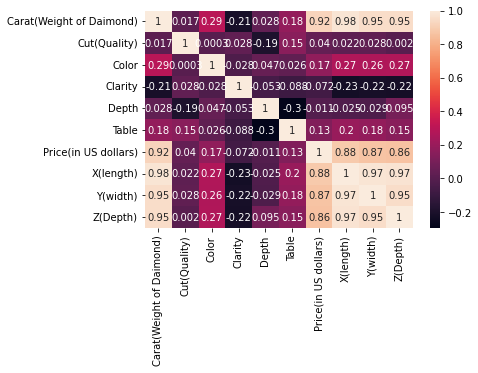

In [8]:
import seaborn as sns

sns.heatmap( data = data.corr() , annot = True )

In [9]:
from sklearn.model_selection import train_test_split

y = data["Price(in US dollars)"]
x = data.drop ( columns = ["Price(in US dollars)"] )

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3)

fit_intercept : [boolean, Default is True] Whether to calculate intercept for the model.   
normalize : [boolean, Default is False] Normalisation before regression.   
copy_X : [boolean, Default is True] If true, make a copy of X else overwritten.   
n_jobs : [int, Default is 1] If -1 all CPU’s are used. This will speedup the working for large datasets to process.   

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(  )

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score

acc = r2_score(y_test, y_pred) * 100

print(acc)


88.0635145718331


# Metrics

In [11]:
# MAE
from sklearn.metrics import mean_absolute_error

err = mean_absolute_error( y_test, y_pred)

print("MAE",err)

# MSE

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))


# RMSE 

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


# RMSLE

print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))


# R2
print("R2",acc)

MAE 864.0084830698405
MSE 1914330.449127093
RMSE 1383.5933105963952
RMSE 7.232439242269883
R2 88.0635145718331


# Residuals

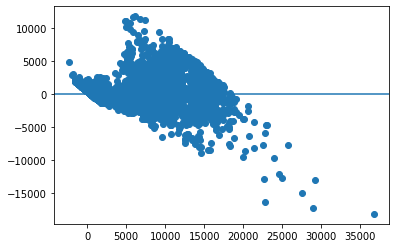

In [12]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred,residuals)
plt.axhline(y=0)
plt.show()

